In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from utils.helper_functions import calculate_cbtmin, calculate_sleep_onset, calculate_sleep_duration

In [61]:
figsize = (8, 4)
title_fontsize = 20
tick_label_fontsize = 14
legend_fontsize = 14
axis_label_fontsize = 16
text_fontsize = 18

# Selected sleep parameters

In [62]:
selected_parameters = pd.read_csv('data/sleep_parameter_exploration/early_light_selected_sleep_parameters.csv')
print(selected_parameters)

    simulation_id    mu  Delta   chi  sleep_time  bedtime    dlmo  \
0               4  17.5    5.0  11.0       6.670   23.300  20.495   
1              28  18.0    5.0  10.0       6.750   22.220  20.495   
2              29  18.0    5.0  11.0       6.985   22.775  20.495   
3              32  18.0    6.0   9.0       6.685   22.690  20.495   
4              33  18.0    6.0  10.0       6.840   23.155  20.500   
..            ...   ...    ...   ...         ...      ...     ...   
56            119  19.5    8.0  11.0       6.955   23.040  20.500   
57            120  19.5    9.0   7.0       7.350   22.185  20.495   
58            121  19.5    9.0   8.0       7.255   22.740  20.500   
59            122  19.5    9.0   9.0       6.945   23.050  20.500   
60            123  19.5    9.0  10.0       6.695   23.300  20.500   

    number_of_switches       x_f      xc_f       n_f        H_f  S_f  
0                  2.0 -0.702769 -0.835897  0.159962  14.692985  1.0  
1                  2.0 -0.702

## Parameter distribution

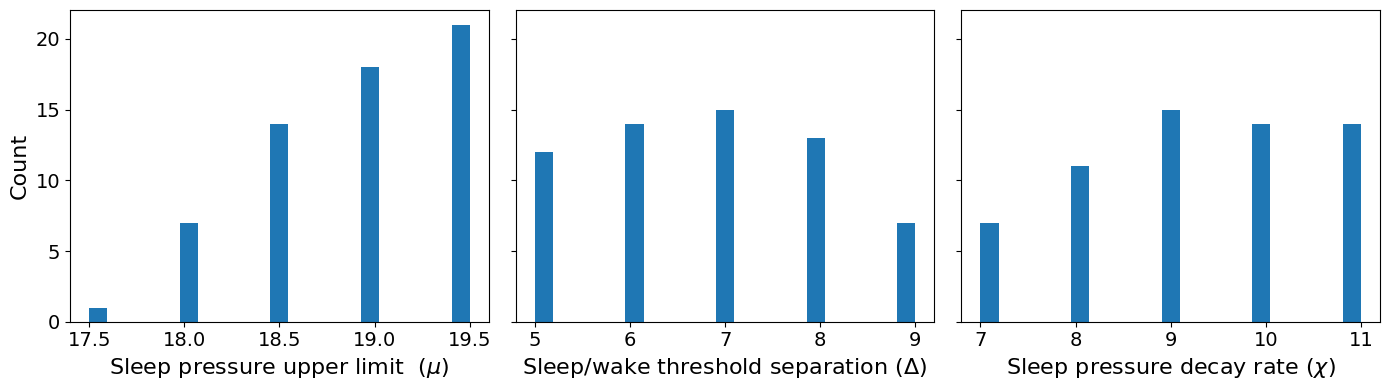

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(1.75*figsize[0], figsize[1]), sharey=True)

axs[0].hist(selected_parameters['mu'], bins=21)
axs[0].set_xlabel('Sleep pressure upper limit  '+r'$(\mu)$', fontsize=axis_label_fontsize)
axs[0].set_ylabel('Count', fontsize=axis_label_fontsize)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[1].hist(selected_parameters['Delta'], bins=21)
axs[1].set_xlabel('Sleep/wake threshold separation 'r'$(\Delta)$', fontsize=axis_label_fontsize)
axs[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[2].hist(selected_parameters['chi'], bins=21)
axs[2].set_xlabel('Sleep pressure decay rate 'r'$(\chi)$', fontsize=axis_label_fontsize)
axs[2].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig('figures/selected_sleep_parameters_histograms.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


## Sleep metrics

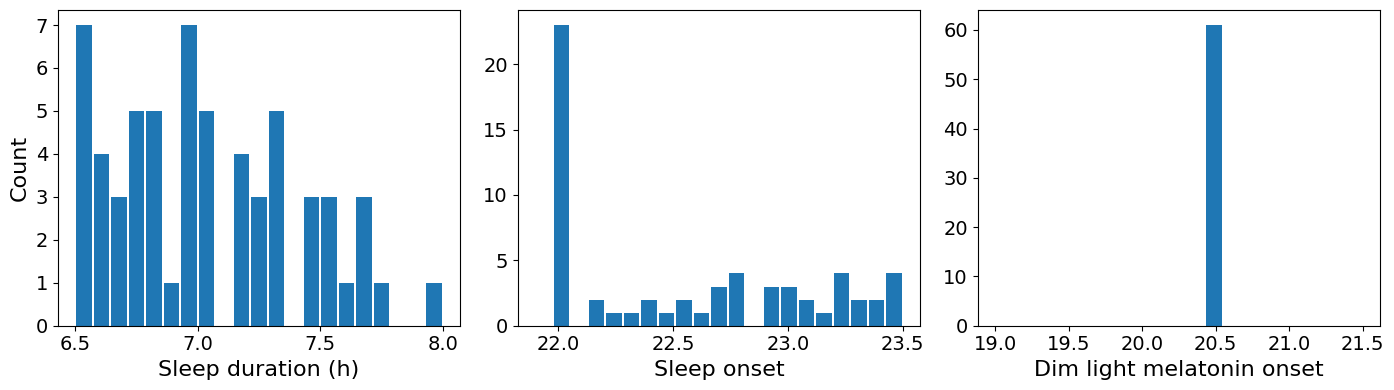

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(1.75*figsize[0], figsize[1]))

axs[0].hist(selected_parameters['sleep_time'], bins=21, rwidth=0.9, range=(6.5, 8))
axs[0].set_xlabel('Sleep duration (h)', fontsize=axis_label_fontsize)
axs[0].set_ylabel('Count', fontsize=axis_label_fontsize)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[1].hist(selected_parameters['bedtime'], bins=21, rwidth=0.9, range=(21.9, 23.5))
axs[1].set_xlabel('Sleep onset', fontsize=axis_label_fontsize)
axs[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[2].hist(selected_parameters['dlmo'], bins=21, rwidth=0.9, range=(19, 21.5))
axs[2].set_xlabel('Dim light melatonin onset', fontsize=axis_label_fontsize)
axs[2].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig('figures/selected_sleep_parameters_metrics_histograms.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


# Selected light parameters

In [65]:
selected_parameters_light = pd.read_csv('data/light_sensitivity_parameter_exploration/early_light_selected_light_sensitivity_parameters.csv')
print(selected_parameters_light)

     simulation_id    mu  Delta   chi    p    k   tauc  sleep_time  bedtime  \
0                0  19.0    6.0  11.0  0.5  0.4  23.80       7.610   22.185   
1                1  19.0    6.0  11.0  0.5  0.4  23.95       7.595   22.400   
2                2  19.0    6.0  11.0  0.5  0.4  24.10       7.470   22.525   
3                3  19.0    6.0  11.0  0.5  0.4  24.25       7.345   22.650   
4                4  19.0    6.0  11.0  0.5  0.4  24.40       7.220   22.775   
..             ...   ...    ...   ...  ...  ...    ...         ...      ...   
120            120  19.0    6.0  11.0  0.7  0.7  23.80       7.385   21.995   
121            121  19.0    6.0  11.0  0.7  0.7  23.95       7.570   21.995   
122            122  19.0    6.0  11.0  0.7  0.7  24.10       7.660   22.240   
123            123  19.0    6.0  11.0  0.7  0.7  24.25       7.580   22.415   
124            124  19.0    6.0  11.0  0.7  0.7  24.40       7.450   22.545   

     number_of_switches    dlmo       x_f      xc_f

## Parameter distribution

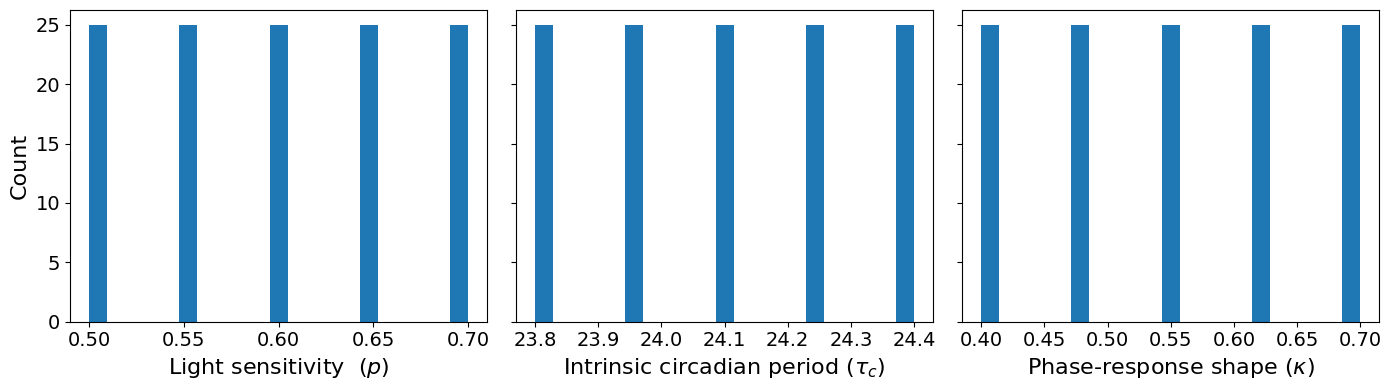

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(1.75*figsize[0], figsize[1]), sharey=True)

axs[0].hist(selected_parameters_light['p'], bins=21)
axs[0].set_xlabel('Light sensitivity  '+r'$(p)$', fontsize=axis_label_fontsize)
axs[0].set_ylabel('Count', fontsize=axis_label_fontsize)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[1].hist(selected_parameters_light['tauc'], bins=21)
axs[1].set_xlabel('Intrinsic circadian period 'r'$(\tau_{c})$', fontsize=axis_label_fontsize)
axs[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[2].hist(selected_parameters_light['k'], bins=21)
axs[2].set_xlabel('Phase-response shape 'r'$(\kappa)$', fontsize=axis_label_fontsize)
axs[2].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig('figures/selected_light_sensitivity_parameters_histograms.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


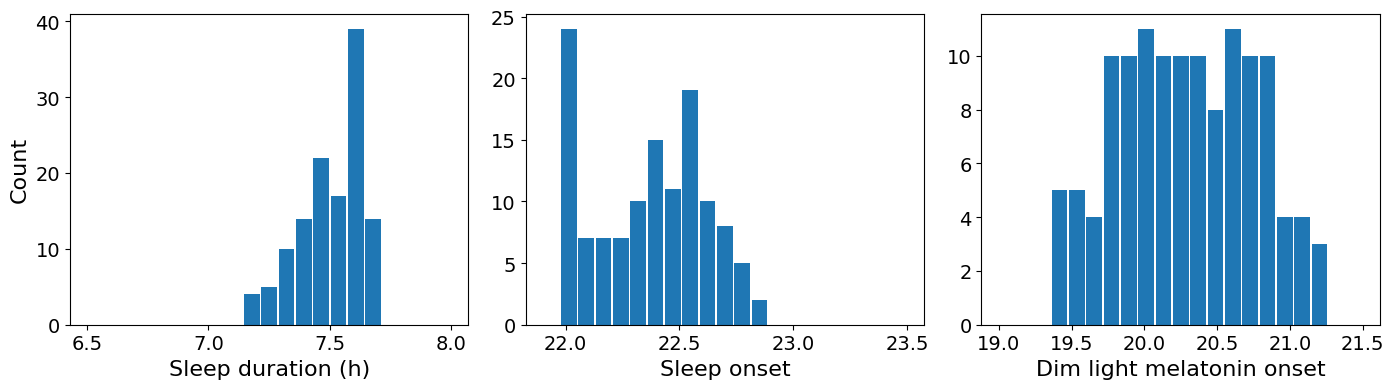

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(1.75*figsize[0], figsize[1]))

axs[0].hist(selected_parameters_light['sleep_time'], bins=21, rwidth=0.9, range=(6.5, 8))
axs[0].set_xlabel('Sleep duration (h)', fontsize=axis_label_fontsize)
axs[0].set_ylabel('Count', fontsize=axis_label_fontsize)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[1].hist(selected_parameters_light['bedtime'], bins=21, rwidth=0.9, range=(21.9, 23.5))
axs[1].set_xlabel('Sleep onset', fontsize=axis_label_fontsize)
axs[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

axs[2].hist(selected_parameters_light['dlmo'], bins=21, rwidth=0.9, range=(19, 21.5))
axs[2].set_xlabel('Dim light melatonin onset', fontsize=axis_label_fontsize)
axs[2].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig('figures/selected_light_sensitivity_parameters_metrics_histograms.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


# Light sensitivity curves

In [68]:
def sensitivity(light, p, alpha_0=0.16, I0=9500.0):
    return alpha_0 * (light / I0) ** p

sensitivity = np.vectorize(sensitivity)

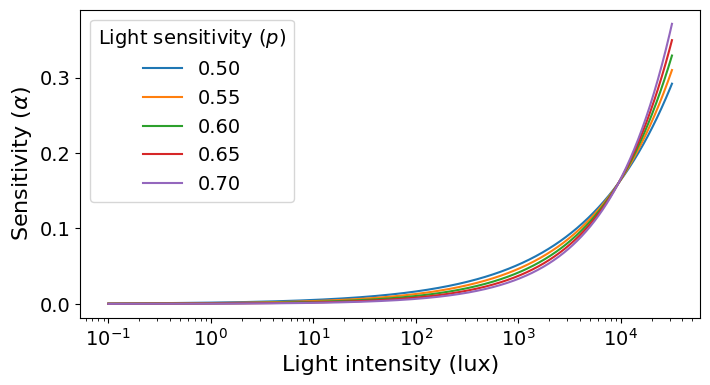

In [78]:
p_values = np.array([0.5, 0.55, 0.6, 0.65, 0.7])
light = np.logspace(-1, 4.5, 1000)

fig, ax = plt.subplots(figsize=figsize)
ax.set_xscale('log')
for p in p_values:
    ax.plot(light, sensitivity(light, p), label=f"{p:.2f}")

ax.set_xlabel('Light intensity (lux)', fontsize=axis_label_fontsize)
ax.set_ylabel('Sensitivity 'r'$(\alpha)$', fontsize=axis_label_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.legend(title='Light sensitivity 'r'$(p)$', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
plt.savefig('figures/light_sensitivity.png', bbox_inches='tight', dpi=300)
plt.show()
